# 1 - Perkenalan

Nama:Suma Bimantoro Andru

Batch:FTDS-015

Dataset: Ethereum Cryptocurrency Historical Data 09.2022

Objective:<b>Membuat model prediksi harga close</b>

# 2 - Import Libraries

In [43]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


# 3 - Data Loading

In [44]:
#load dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
# Load Dataset

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/phase1/Milestone2/dataset/eth-usdt.csv')

In [46]:
#Tampilkan Head
data.head(3)

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,2018-07-30 00:00:00.000000000,466.40,466.96,459.33,462.17,7243.89422,2018-07-30 00:29:59.999000064,3.346752e+06,4374,2505.43960,1.157332e+06,0
1,2018-07-30 00:30:00.000000000,462.18,463.73,460.80,463.25,5109.95379,2018-07-30 00:59:59.999000064,2.362062e+06,1985,3217.78863,1.487773e+06,0
2,2018-07-30 01:00:00.000000000,463.31,465.83,462.54,465.78,4246.39675,2018-07-30 01:29:59.999000064,1.968973e+06,1758,2312.34703,1.072244e+06,0


In [47]:
#Tampilkan Tail
data.tail(3)

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
65716,2022-05-02 04:30:00.000000000,2836.73,2865.83,2835.79,2856.81,11939.5962,2022-05-02 04:59:59.999000064,3.404923e+07,14476,6894.8556,1.966199e+07,0
65717,2022-05-02 05:00:00.000000000,2856.82,2861.00,2849.41,2852.82,5185.0072,2022-05-02 05:29:59.999000064,1.480223e+07,7277,2798.4998,7.988733e+06,0
65718,2022-05-02 05:30:00.000000000,2852.81,2860.74,2852.70,2859.99,4661.5706,2022-05-02 05:59:59.999000064,1.331682e+07,4663,2577.6783,7.363419e+06,0


In [48]:
# Duplicate Dataset

data_copy = data.copy()

In [49]:
#tampilkan informasi untuk melihat field
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65719 entries, 0 to 65718
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Open Time           65719 non-null  object 
 1   Open                65719 non-null  float64
 2   High                65719 non-null  float64
 3   Low                 65719 non-null  float64
 4   Close               65719 non-null  float64
 5   Volume              65719 non-null  float64
 6   Close Time          65719 non-null  object 
 7   Quote Asset Volume  65719 non-null  float64
 8   Number of Trades    65719 non-null  int64  
 9   TB Base Volume      65719 non-null  float64
 10  TB Quote Volume     65719 non-null  float64
 11  Ignore              65719 non-null  int64  
dtypes: float64(8), int64(2), object(2)
memory usage: 6.0+ MB


<p>Di dataset ini ada <b>12</b> columns dan <b>65719</b> row, tipe data semua </b></p>

In [50]:
#check dataset
data.describe()

,Open,High,Low,Close,Volume,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
count,65719.000000,65719.00000,65719.000000,65719.000000,65719.000000,6.571900e+04,65719.000000,65719.000000,6.571900e+04,65719.0
mean,1154.396924,1159.99188,1148.451672,1154.432044,13614.703689,1.634441e+07,11883.118489,6813.051691,8.148904e+06,0.0
std,1352.893440,1359.10125,1346.332762,1352.906963,15622.242670,2.900054e+07,16131.101106,7747.320816,1.438592e+07,0.0
min,82.160000,82.60000,81.790000,82.170000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.0
25%,182.405000,183.01000,181.700000,182.410000,4959.224700,1.180512e+06,2639.000000,2490.201230,5.966405e+05,0.0
50%,288.560000,289.90000,287.190000,288.560000,8964.049580,3.971908e+06,5813.000000,4515.472240,2.001868e+06,0.0
75%,2262.785000,2282.02500,2243.300000,2262.965000,16281.133560,2.148663e+07,15063.500000,8158.576870,1.063659e+07,0.0
max,4846.940000,4868.00000,4838.120000,4846.710000,310769.822340,7.662081e+08,386378.000000,143798.787600,3.622547e+08,0.0


<p>Terlihat dari <b>median</b> open dan close bernilai <b>sama</b>, yang artinya terjadi stagnan di coin eth</p>

# 4 - Exploratory Data Analysis (EDA)

<h1><b>Close,Open,High,low</b></h1>

In [51]:
#cek Feature
data['Close'].unique()

array([ 462.17,  463.25,  465.78, ..., 2856.81, 2852.82, 2859.99])

In [52]:
#cek Feature
data['Open'].unique()

array([ 466.4 ,  462.18,  463.31, ..., 2836.73, 2856.82, 2852.81])

In [53]:
#cek Feature
data['High'].unique()

array([ 466.96,  463.73,  465.83, ..., 2865.83, 2861.  , 2860.74])

In [54]:
#cek Feature
data['Low'].unique()

array([ 459.33,  460.8 ,  462.54, ..., 2835.79, 2849.41, 2852.7 ])

<p>lose (<b>data regresi dimana close,open,high dan low adalah berbentuk satuan dolar</b>)</p>

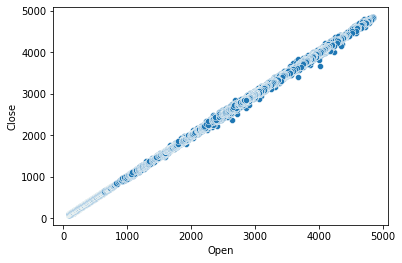

In [55]:
#membuat count plot
sns.scatterplot(data=data, x="Open", y="Close")

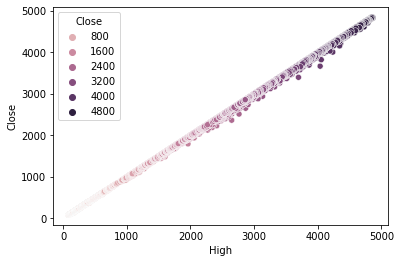

In [56]:
#membuat count plot
sns.scatterplot(data=data, x="High", y="Close", hue="Close")

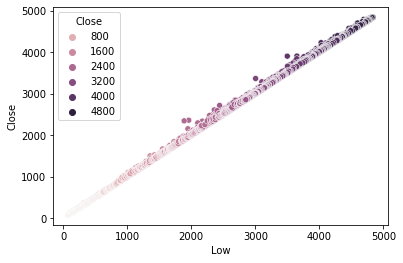

In [57]:
#membuat count plot
sns.scatterplot(data=data, x="Low", y="Close", hue="Close")

<h1>dimana terlihat ada corelasi open,high dan low  terhadap closing dimana ada terlihat pergerakan liniear terhadap target close, dan <b>closing di angka yang tidak jauh dari angka feature tersebut.</b>

<h1><b>Volume,Quote Asset Volume</b></h1>

In [58]:
#cek column volume
data['Volume'].unique()

array([ 7243.89422,  5109.95379,  4246.39675, ..., 11939.5962 ,
        5185.0072 ,  4661.5706 ])

In [59]:
#cek column Quote Asset Volume
data['Quote Asset Volume'].unique()

array([ 3346752.337381 ,  2362061.7148514,  1968973.3881544, ...,
       34049230.061496 , 14802231.930602 , 13316823.158354 ])

<p><b>Terlihat volume dan Quote Asset Volume adalah data regresi dimana satuan $</p>

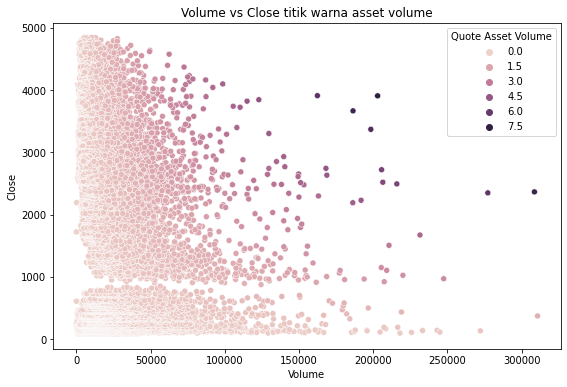

In [60]:
#membuat plot untuk melihat berhubungan feature dengan target
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 2)
sns.scatterplot(x='Volume', y='Close', data=data, hue='Quote Asset Volume')
plt.title('Volume vs Close titik warna asset volume')
plt.xlabel('Volume')
plt.ylabel('Close')
plt.show()

<p>Bertumpuknya bins volume 0 sampai 50.000 dolar dan sama closing di angkat 5.000$ terlihat kecilnya korelasi antara volume dan close, jika dari warna Quate asset volume, terlihat ada perubahan warna makin volume tinggi dan closing tinggi, menandakan ada <b>korelasi di feature Quote Asset Volume</b></p>

<h1><b>Number of Trades<b></h1>

In [61]:
#cek column Number of Trades
data['Number of Trades'].unique()

array([ 4374,  1985,  1758, ..., 14083, 21500,  7277])

Text(0.5, 1.0, 'Number of Trades vs Close')

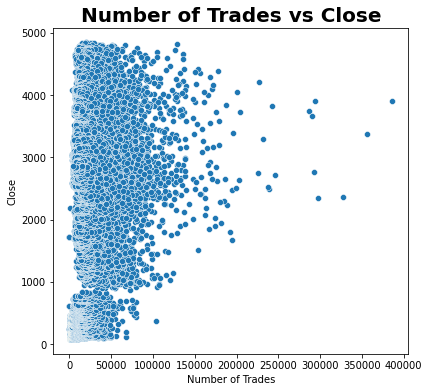

In [62]:
#membuat Plot
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Number of Trades',y='Close', data=data)
plt.title('Number of Trades vs Close',fontweight="bold", size=20)

Text(0.5, 1.0, 'Number of Trades vs Close')

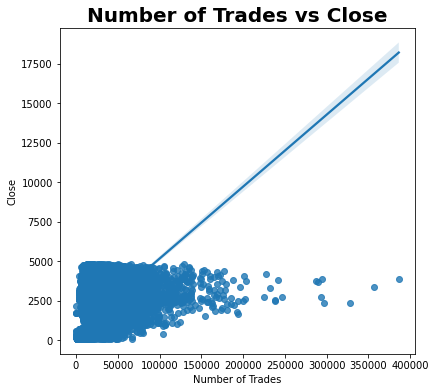

In [63]:
#membuat Plot
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.regplot(x='Number of Trades',y='Close', data=data)
plt.title('Number of Trades vs Close',fontweight="bold", size=20)

Dengan menambahkan garis linear di atas, kita dapat melihat korelasi positif yang sangat samar antara Close dan Number of trade. Ada kemungkinan Closing diatas diangka 5000 untuk user trading langsung jual dan menunggu open kembali.

<h1><b>TB Base Volume</b></h1>
<h1><b>TB Quote Volume</b></h1>

In [64]:
#cek column Number of Trades
data['TB Base Volume'].unique()

array([2505.4396 , 3217.78863, 2312.34703, ..., 6894.8556 , 2798.4998 ,
       2577.6783 ])

In [65]:
#cek column TB Quote Volume
data['TB Quote Volume'].unique()

array([ 1157331.6327314,  1487772.7118348,  1072243.79187  , ...,
       19661987.718161 ,  7988733.489845 ,  7363419.414468 ])

Text(0.5, 1.0, 'TB Base Volume vs TB Quote Volume')

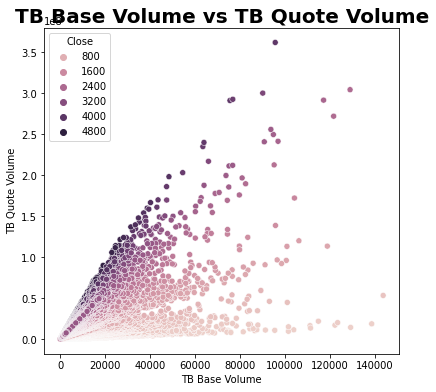

In [66]:
#membuat Plot
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='TB Base Volume',y='TB Quote Volume', data=data, hue='Close')
plt.title('TB Base Volume vs TB Quote Volume',fontweight="bold", size=20)

<p>Terlihat banyak Bold bins di TB Quate Volume, yang artinnya<b> ada korelasi close dan TBQuate Volume</b> tetapi kecilnya korelasi kepadan tb Base Volume</p>

<h1>Ignore</h1>

In [67]:
data['Ignore'].unique()

array([0])

data iqnore 0, dan hanya 0, yang artinnya tidak ada korelasi apa2 antara feature ini kepada target CLose kita

<h1><b>C-MAP</b></h1>

In [68]:
#melihat corelasi dengan c-map
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

#Correlation Between Numeric Columns
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,Open,High,Low,Close,Volume,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
Open,1.000000,0.999978,0.999965,0.999958,0.030232,0.565876,0.543603,0.027169,0.567495,nan
High,0.999978,1.000000,0.999950,0.999977,0.032464,0.568676,0.546409,0.029645,0.570616,nan
Low,0.999965,0.999950,1.000000,0.999973,0.026805,0.561537,0.539565,0.024141,0.563671,nan
Close,0.999958,0.999977,0.999973,1.000000,0.029936,0.565480,0.543401,0.027357,0.567734,nan
Volume,0.030232,0.032464,0.026805,0.029936,1.000000,0.590547,0.643489,0.989130,0.583685,nan
Quote Asset Volume,0.565876,0.568676,0.561537,0.565480,0.590547,1.000000,0.952560,0.581652,0.992366,nan
Number of Trades,0.543603,0.546409,0.539565,0.543401,0.643489,0.952560,1.000000,0.635667,0.948759,nan
TB Base Volume,0.027169,0.029645,0.024141,0.027357,0.989130,0.581652,0.635667,1.000000,0.587105,nan
TB Quote Volume,0.567495,0.570616,0.563671,0.567734,0.583685,0.992366,0.948759,0.587105,1.000000,nan
Ignore,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


<p>Setelah dilihat dari correlation , <b>peneliti akan memakai open,high dan low,</b> dengan pertimbangan, karena peneliti membuat model ini untuk masyarakat umum, jadi peneliti akan memasukan feature yang dimana masyarakat umum dapat tau informasi dari web trading tersebut</b>,</p>
<li>Open=0.999958
<li>High=0.999977
<li>Low=0.999973


# 5 - Data Preprocessing

Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

In [69]:
#rubah object ke tanggal
data['Open Time'] = pd.to_datetime(data['Open Time'])
data['Close Time'] = pd.to_datetime(data['Close Time'])

## Get data for model inference

In [70]:
## Get data for model inference
data_inf = data.sample(20, random_state=17)
data_inf

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
30999,2020-05-07 21:30:00,211.67,212.74,211.04,212.28,8430.03234,2020-05-07 21:59:59.999000064,1.786312e+06,3138,4536.57083,9.613210e+05,0
35151,2020-08-02 13:00:00,359.19,364.89,358.55,363.90,31341.75052,2020-08-02 13:29:59.999000064,1.136947e+07,13536,13407.87399,4.863080e+06,0
26068,2020-01-25 17:00:00,161.06,161.35,160.61,160.65,2725.35438,2020-01-25 17:29:59.999000064,4.387203e+05,1285,1886.98892,3.037838e+05,0
48722,2021-05-12 21:00:00,4098.96,4139.96,4076.31,4138.15,14485.86676,2021-05-12 21:29:59.999000064,5.947341e+07,36605,7107.41265,2.918371e+07,0
7091,2018-12-25 04:00:00,123.61,126.49,123.33,125.75,30608.44170,2018-12-25 04:29:59.999000064,3.822828e+06,8391,16443.90439,2.053765e+06,0
3202,2018-10-04 17:00:00,224.17,224.33,223.01,223.15,3155.32958,2018-10-04 17:29:59.999000064,7.053454e+05,3000,1176.33760,2.630684e+05,0
59842,2021-12-30 19:30:00,3758.06,3769.10,3748.70,3751.06,4060.88700,2021-12-30 19:59:59.999000064,1.526765e+07,9644,1872.46140,7.039526e+06,0
19559,2019-09-11 22:30:00,177.68,178.54,177.67,178.35,2461.50220,2019-09-11 22:59:59.999000064,4.386104e+05,1713,1376.51068,2.452705e+05,0
17712,2019-08-04 03:00:00,220.80,220.90,220.20,220.39,2922.40077,2019-08-04 03:29:59.999000064,6.446054e+05,1605,1046.74853,2.308752e+05,0
26522,2020-02-04 04:00:00,188.08,189.00,188.07,188.62,5641.94692,2020-02-04 04:29:59.999000064,1.064297e+06,3224,2970.74668,5.604470e+05,0


In [71]:
# remove inference set from data set
data_train_test = data.drop(data_inf.index)
data_train_test

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,2018-07-30 00:00:00,466.40,466.96,459.33,462.17,7243.89422,2018-07-30 00:29:59.999000064,3.346752e+06,4374,2505.43960,1.157332e+06,0
1,2018-07-30 00:30:00,462.18,463.73,460.80,463.25,5109.95379,2018-07-30 00:59:59.999000064,2.362062e+06,1985,3217.78863,1.487773e+06,0
2,2018-07-30 01:00:00,463.31,465.83,462.54,465.78,4246.39675,2018-07-30 01:29:59.999000064,1.968973e+06,1758,2312.34703,1.072244e+06,0
3,2018-07-30 01:30:00,465.83,469.79,465.59,467.07,4739.69169,2018-07-30 01:59:59.999000064,2.213044e+06,2743,3453.32561,1.612223e+06,0
4,2018-07-30 02:00:00,467.00,467.06,465.00,465.57,1285.96761,2018-07-30 02:29:59.999000064,5.991792e+05,1476,810.74776,3.777827e+05,0
...,...,...,...,...,...,...,...,...,...,...,...,...
65714,2022-05-02 03:30:00,2835.99,2845.87,2835.25,2840.72,6154.79540,2022-05-02 03:59:59.999000064,1.749037e+07,7448,3899.76570,1.108108e+07,0
65715,2022-05-02 04:00:00,2840.72,2845.39,2832.10,2836.72,5452.19620,2022-05-02 04:29:59.999000064,1.547552e+07,6670,2814.16580,7.987077e+06,0
65716,2022-05-02 04:30:00,2836.73,2865.83,2835.79,2856.81,11939.59620,2022-05-02 04:59:59.999000064,3.404923e+07,14476,6894.85560,1.966199e+07,0
65717,2022-05-02 05:00:00,2856.82,2861.00,2849.41,2852.82,5185.00720,2022-05-02 05:29:59.999000064,1.480223e+07,7277,2798.49980,7.988733e+06,0


In [72]:
#reset index to reduce error
data_train_test.reset_index(drop= True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,2020-05-07 21:30:00,211.67,212.74,211.04,212.28,8430.03234,2020-05-07 21:59:59.999000064,1.786312e+06,3138,4536.57083,9.613210e+05,0
1,2020-08-02 13:00:00,359.19,364.89,358.55,363.90,31341.75052,2020-08-02 13:29:59.999000064,1.136947e+07,13536,13407.87399,4.863080e+06,0
2,2020-01-25 17:00:00,161.06,161.35,160.61,160.65,2725.35438,2020-01-25 17:29:59.999000064,4.387203e+05,1285,1886.98892,3.037838e+05,0
3,2021-05-12 21:00:00,4098.96,4139.96,4076.31,4138.15,14485.86676,2021-05-12 21:29:59.999000064,5.947341e+07,36605,7107.41265,2.918371e+07,0
4,2018-12-25 04:00:00,123.61,126.49,123.33,125.75,30608.44170,2018-12-25 04:29:59.999000064,3.822828e+06,8391,16443.90439,2.053765e+06,0
5,2018-10-04 17:00:00,224.17,224.33,223.01,223.15,3155.32958,2018-10-04 17:29:59.999000064,7.053454e+05,3000,1176.33760,2.630684e+05,0
6,2021-12-30 19:30:00,3758.06,3769.10,3748.70,3751.06,4060.88700,2021-12-30 19:59:59.999000064,1.526765e+07,9644,1872.46140,7.039526e+06,0
7,2019-09-11 22:30:00,177.68,178.54,177.67,178.35,2461.50220,2019-09-11 22:59:59.999000064,4.386104e+05,1713,1376.51068,2.452705e+05,0
8,2019-08-04 03:00:00,220.80,220.90,220.20,220.39,2922.40077,2019-08-04 03:29:59.999000064,6.446054e+05,1605,1046.74853,2.308752e+05,0
9,2020-02-04 04:00:00,188.08,189.00,188.07,188.62,5641.94692,2020-02-04 04:29:59.999000064,1.064297e+06,3224,2970.74668,5.604470e+05,0


## Splitting between `X` (Features) and `y` (Target)

In [73]:
# Split between `X` (Features) and `y` (Target)

X = data_train_test.drop('Close', axis=1)
y = data_train_test['Close']
X

,Open Time,Open,High,Low,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,2018-07-30 00:00:00,466.40,466.96,459.33,7243.89422,2018-07-30 00:29:59.999000064,3.346752e+06,4374,2505.43960,1.157332e+06,0
1,2018-07-30 00:30:00,462.18,463.73,460.80,5109.95379,2018-07-30 00:59:59.999000064,2.362062e+06,1985,3217.78863,1.487773e+06,0
2,2018-07-30 01:00:00,463.31,465.83,462.54,4246.39675,2018-07-30 01:29:59.999000064,1.968973e+06,1758,2312.34703,1.072244e+06,0
3,2018-07-30 01:30:00,465.83,469.79,465.59,4739.69169,2018-07-30 01:59:59.999000064,2.213044e+06,2743,3453.32561,1.612223e+06,0
4,2018-07-30 02:00:00,467.00,467.06,465.00,1285.96761,2018-07-30 02:29:59.999000064,5.991792e+05,1476,810.74776,3.777827e+05,0
...,...,...,...,...,...,...,...,...,...,...,...
65694,2022-05-02 03:30:00,2835.99,2845.87,2835.25,6154.79540,2022-05-02 03:59:59.999000064,1.749037e+07,7448,3899.76570,1.108108e+07,0
65695,2022-05-02 04:00:00,2840.72,2845.39,2832.10,5452.19620,2022-05-02 04:29:59.999000064,1.547552e+07,6670,2814.16580,7.987077e+06,0
65696,2022-05-02 04:30:00,2836.73,2865.83,2835.79,11939.59620,2022-05-02 04:59:59.999000064,3.404923e+07,14476,6894.85560,1.966199e+07,0
65697,2022-05-02 05:00:00,2856.82,2861.00,2849.41,5185.00720,2022-05-02 05:29:59.999000064,1.480223e+07,7277,2798.49980,7.988733e+06,0


In [74]:
# Split between Train-Set and Test-Set 80% dan 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (52559, 11)
Test Size  :  (13140, 11)


## Handling outliers

In [75]:
# Plot outlier for target

def outlier_plot(features):
    # Define figure size
    plt.figure(figsize=(16, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(features, bins=30, kde=True)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=features)
    plt.title('Boxplot')

    plt.show()

In [76]:
# make function to see histogram distribusion data dan box plot outliers
def diagnostic_plots(df_train, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df_train[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df_train[variable])
    plt.title('Boxplot')

    plt.show()
    
    print('skewness:', df_train[variable].skew())
    if (df_train[variable].skew() >= -0.5 ) | (df_train[variable].skew() <= 0.5 ) :
      print('the distribution is skewed')
    else:
      print('the distribution is normal')

In [77]:
# make boundary function
def iqr_calc(feature):
    skew_value = feature.skew()
    if -0.5 > skew_value < 0.5:
        upper_boundary = feature.mean() + 3 * feature.std()
        lower_boundary = feature.mean() - 3 * feature.std()
    else:
        IQR= feature.quantile(0.75) - feature.quantile(0.25)
        lower_boundary= feature.quantile(0.25)-(IQR*1.5)
        upper_boundary= feature.quantile(0.75)+(IQR*1.5)
    return lower_boundary, upper_boundary

In [78]:
# make capping function
def capping_data(dataset, column):
  lower_bound, upper_bound = iqr_calc(dataset[column])
  dataset.loc[dataset[column] > upper_bound, column] = upper_bound
  dataset.loc[dataset[column] < lower_bound, column] = lower_bound
  return dataset

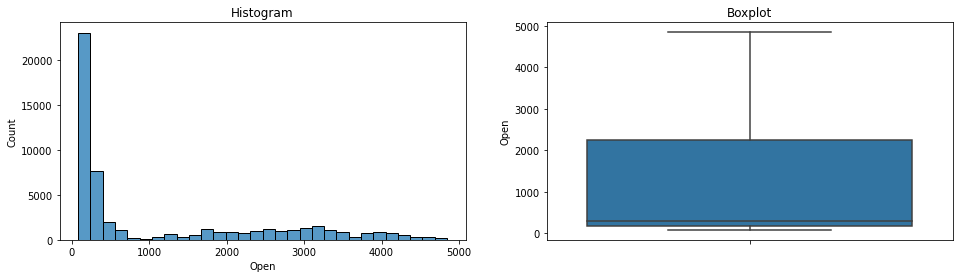

skewness: 1.0525615887031563
the distribution is skewed


In [79]:
# diagram open
diagnostic_plots(X_train, 'Open')


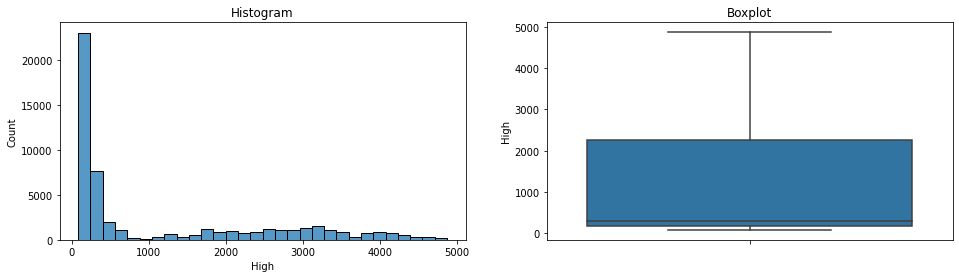

skewness: 1.0507728699590893
the distribution is skewed


In [80]:
# diagram high
diagnostic_plots(X_train, 'High')


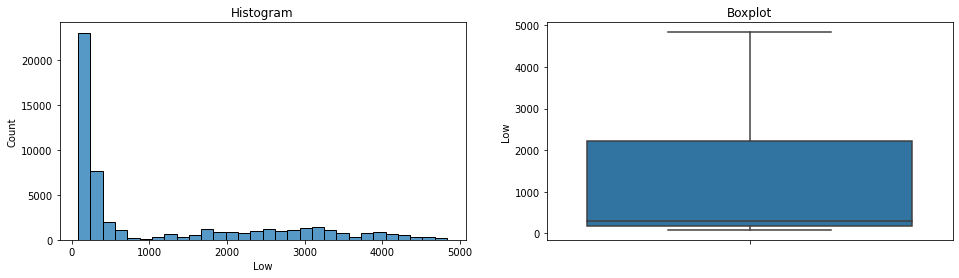

skewness: 1.0546202845912593
the distribution is skewed


In [81]:
# diagram low
diagnostic_plots(X_train, 'Low')


<b><h1>Setelah peneliti lihat tidak ada outlier, tetapi data <i>skew</i></h1></b>

## Handling missing Value

In [82]:
# Check Missing Values in `X_train`
X_train.isnull().sum()

Open Time             0
Open                  0
High                  0
Low                   0
Volume                0
Close Time            0
Quote Asset Volume    0
Number of Trades      0
TB Base Volume        0
TB Quote Volume       0
Ignore                0
dtype: int64

In [83]:
# Check Missing Values in `X_test`

X_test.isnull().sum()

Open Time             0
Open                  0
High                  0
Low                   0
Volume                0
Close Time            0
Quote Asset Volume    0
Number of Trades      0
TB Base Volume        0
TB Quote Volume       0
Ignore                0
dtype: int64

In [84]:
# Check Missing Values in `y_train`

y_train.isnull().sum()

0

In [85]:
# Check Missing Values in `y_test`

y_test.isna().sum()

0

<b><h1>Tidak ada missing value di X ataupun y</h1></b>

## Feature Selection

In [86]:
#display Xtrain
X_train

,Open Time,Open,High,Low,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
35291,2020-08-05 19:00:00,397.45,400.00,397.43,22282.87915,2020-08-05 19:29:59.999000064,8.888336e+06,8429,12807.60618,5.109187e+06,0
55548,2021-10-02 18:00:00,3429.82,3444.51,3411.37,7879.73990,2021-10-02 18:29:59.999000064,2.698801e+07,17073,3525.05080,1.207561e+07,0
18256,2019-08-15 23:00:00,187.89,188.73,186.26,7958.22526,2019-08-15 23:29:59.999000064,1.491950e+06,3933,3072.80317,5.764441e+05,0
45685,2021-03-10 16:00:00,1831.04,1841.46,1820.75,19416.58066,2021-03-10 16:29:59.999000064,3.557054e+07,20983,9324.14449,1.708125e+07,0
27291,2020-02-20 17:30:00,253.09,254.52,250.76,22248.86886,2020-02-20 17:59:59.999000064,5.620705e+06,9058,11573.03169,2.924113e+06,0
...,...,...,...,...,...,...,...,...,...,...,...
37332,2020-09-17 07:30:00,381.05,381.11,378.61,21168.42207,2020-09-17 07:59:59.999000064,8.043622e+06,8777,9481.09487,3.602480e+06,0
25631,2020-01-16 20:00:00,163.56,164.25,163.50,3432.12448,2020-01-16 20:29:59.999000064,5.625737e+05,2383,1748.66764,2.866654e+05,0
42297,2020-12-29 23:30:00,729.64,737.30,729.48,25026.20028,2020-12-29 23:59:59.999000064,1.837053e+07,14632,13934.34553,1.022808e+07,0
34959,2020-07-29 20:00:00,321.68,322.96,321.49,10904.15756,2020-07-29 20:29:59.999000064,3.513458e+06,4985,5756.67820,1.854660e+06,0


In [87]:
# membuat df bedasarkan Feature selection

X_train_num=X_train[['Open','High','Low']]
X_test_num=X_test[['Open','High','Low']]
X_train_num

,Open,High,Low
35291,397.45,400.00,397.43
55548,3429.82,3444.51,3411.37
18256,187.89,188.73,186.26
45685,1831.04,1841.46,1820.75
27291,253.09,254.52,250.76
...,...,...,...
37332,381.05,381.11,378.61
25631,163.56,164.25,163.50
42297,729.64,737.30,729.48
34959,321.68,322.96,321.49


## Split between Numerical Columns and Categorical Columns

##<p>Peneliti tidak split numerical dan categorical dikarenakan peneliti akan memakai Pipline</p>

## Feature Scaling

##<p>Peneliti memakai pipline dan scaling minmax untuk feature <b>skew</b> dan standard scaler untuk yang tidak <b>skew</b></p>

In [88]:
numeric_skew = ["Open","High","Low"]

numeric_transformer_mms = Pipeline([("scaler", MinMaxScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer_mms, numeric_skew)
    ]
)


## Feature Encoding

##Tidak Melakukan proses Encoding karena data Feature bertipe numerik semua

## Concate between Numerical Columns and Categorical Columns

###tidak ada concate, tetapi mendefinisikan menjadi X_train_final dan X_test_final

In [89]:
# Mendefinisikan X_train ke X_train_final

X_train_final = X_train_num
X_test_final = X_test_num
X_test_final

,Open,High,Low
52614,2617.75,2624.28,2577.57
61359,2672.50,2684.57,2662.51
18699,189.06,189.26,187.99
56107,3627.08,3639.39,3625.00
45267,1520.84,1547.63,1518.64
...,...,...,...
60227,3215.66,3216.32,3204.43
9392,120.45,120.50,119.37
14687,265.21,268.25,265.11
30616,223.41,223.81,222.19


# 6 - Model Definition

Disini akan melakukan dengan model
<li>LinearRegression
<li>SVR()
<li>Ridge()
<li>Lasso()
<li>RandomForestRegressor()

In [90]:
#mendefinisikan model
lr = LinearRegression()
SVR_model = SVR()
ridge_model = Ridge()
lasso_model = Lasso()
rf=RandomForestRegressor()






# 7 - Model Training

In [91]:
#LinearRegression()
pipelr = Pipeline([("prep", preprocessor), ("lr", LinearRegression())])
pipelr.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Open', 'High', 'Low'])])),
                ('lr', LinearRegression())])

In [92]:
#SVR()
pipesvr = Pipeline([("prep", preprocessor), ("SVR_model", SVR())])
pipesvr.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Open', 'High', 'Low'])])),
                ('SVR_model', SVR())])

In [93]:
#Ridge()
piperidge = Pipeline([("prep", preprocessor), ("ridge_model", Ridge())])
piperidge.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Open', 'High', 'Low'])])),
                ('ridge_model', Ridge())])

In [94]:
#Lasso()
pipelasso = Pipeline([("prep", preprocessor), ("lasso_model", Lasso())])
%timeit pipelasso.fit(X_train,y_train)

14.7 ms ± 324 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [95]:
#RandomForestRegressor
piperf = Pipeline([("prep", preprocessor), ("RandomForestRegressor", RandomForestRegressor())])
%timeit piperf.fit(X_train,y_train)

21.7 s ± 2.08 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


# 8 - Model Evaluation

##LinearRegression

In [96]:
#Define variable untuk memakai Cross_val_score
scoreslr = cross_val_score(pipelr, X_train_final, y_train,cv=5)


In [97]:
#memakai method mean() untuk mencari mean
scoreslr.mean()

0.9999823629437387

In [98]:
#memakai method std() untuk mencari std
scoreslr.std()

6.689266190984511e-07

##SVM SVR

In [99]:
#Define variable untuk memakai Cross_val_score
scores_SVM = cross_val_score(pipesvr, X_train_final, y_train,cv=5)

In [100]:
#memakai method mean() untuk mencari mean
scores_SVM.mean()

0.995617211773898

In [101]:
#memakai method std() untuk mencari std
scores_SVM.std()

0.00036618549532707096

##Ridge

In [102]:
#Define variable untuk memakai Cross_val_score
scores_ridge = cross_val_score(piperidge, X_train_final, y_train,cv=5)

In [103]:
#memakai method mean() untuk mencari mean
scores_ridge.mean()

0.9999644433998454

In [104]:
#memakai method std() untuk mencari std
scores_ridge.std()

2.096477815832798e-06

##lasso

In [105]:
#Define variable untuk memakai Cross_val_score
scores_lasso = cross_val_score(pipelasso, X_train_final, y_train,cv=5)

In [106]:
#memakai method mean() untuk mencari mean
scores_lasso.mean()

0.9999082824295311

In [107]:
#memakai method std() untuk mencari std
scores_lasso.std()

5.179226440194823e-06

##RandomForestRegressor

In [108]:
#Define variable untuk memakai Cross_val_score
scores_rf = cross_val_score(piperf, X_train_final, y_train,cv=5)

In [109]:
#memakai method mean() untuk mencari mean
scores_rf.mean()

0.9999769345647739

In [110]:
#memakai method std() untuk mencari std
scores_rf.std()

2.194886288759733e-06

<h1>setelah melakukan evaluasi dengan validation score peneliti akan menampilkan rekap di hasil scoring</h1>

##<b><h1>Hasil Scoring</h1></b>


In [111]:
#define variable dan melakukan predict bagi data test dan data train
#LinearRegression()
y_pred_train_pipelr = pipelr.predict(X_train_final)
y_pred_test_pipelr= pipelr.predict(X_test_final)

#SVR()
y_pred_train_pipesvr = pipesvr.predict(X_train_final)
y_pred_test_pipesvr = pipesvr.predict(X_test_final)

#Ridge()
y_pred_train_piperidge = piperidge.predict(X_train_final)
y_pred_test_piperidge = piperidge.predict(X_test_final)

#Lasso()
y_pred_train_pipelasso = pipelasso.predict(X_train_final)
y_pred_test_pipelasso = pipelasso.predict(X_test_final)

#RandomForestRegressor
y_pred_train_piperf = piperf.predict(X_train_final)
y_pred_test_piperf = piperf.predict(X_test_final)


In [112]:
#tes score dan MAE
print('----Training Set----')
print(f'Training Score LinearRegression: {pipelr.score(X_train_final, y_train):.2f}')
print(f'Training Mean Absolute Error (MAE): {mean_absolute_error(y_train, pipelr.predict(X_train_final))}')
print('')
print(f'Training Score SVR: {pipesvr.score(X_train_final, y_train):.2f}')
print(f'Training Mean Absolute Error (MAE): {mean_absolute_error(y_train, pipesvr.predict(X_train_final))}')
print('')
print(f'Training Score Ridge: {piperidge.score(X_train_final, y_train):.2f}')
print(f'Training Mean Absolute Error (MAE): {mean_absolute_error(y_train, piperidge.predict(X_train_final))}')
print('')
print(f'Training Score Lasso: {pipelasso.score(X_train_final, y_train):.2f}')
print(f'Training Mean Absolute Error (MAE): {mean_absolute_error(y_train, pipelasso.predict(X_train_final))}')
print('')
print(f'Training Score RandomForestRegressor: {piperf.score(X_train_final, y_train):.2f}')
print(f'Training Mean Absolute Error (MAE): {mean_absolute_error(y_train, piperf.predict(X_train_final))}')

----Training Set----
Training Score LinearRegression: 1.00
Training Mean Absolute Error (MAE): 2.515328896494644

Training Score SVR: 1.00
Training Mean Absolute Error (MAE): 19.55076802014293

Training Score Ridge: 1.00
Training Mean Absolute Error (MAE): 3.612813778474873

Training Score Lasso: 1.00
Training Mean Absolute Error (MAE): 6.818866981050594

Training Score RandomForestRegressor: 1.00
Training Mean Absolute Error (MAE): 1.035344616526199


dari score semua sama 100% predik dan MAE paling bagus di random forest dengan tingkat error 1 dolar

In [113]:
#Menampilkan semua perhitungan validation score di semua model algoritma yang sudah kita definisikan 
print (f'LinearRegression Mean :{scoreslr.mean()}')
print (f'LinearRegression STD :{scoreslr.std()}')
print('')
print (f'Model SVR Mean :{scores_SVM.mean()}')
print (f'Model SVR STD :{scores_SVM.std()}')
print('')
print (f'Model Ridge Mean :{scores_ridge.mean()}')
print (f'Model Ridge STD:{scores_ridge.std()}')
print('')
print (f'Model Lasso Mean:{scores_lasso.mean()}')
print (f'Model Lasso STD:{scores_lasso.std()}')
print('')
print (f'Model RandomForestRegressor Mean :{scores_rf.mean()}')
print (f'Model RandomForestRegressor STD :{scores_rf.std()}')



LinearRegression Mean :0.9999823629437387
LinearRegression STD :6.689266190984511e-07

Model SVR Mean :0.995617211773898
Model SVR STD :0.00036618549532707096

Model Ridge Mean :0.9999644433998454
Model Ridge STD:2.096477815832798e-06

Model Lasso Mean:0.9999082824295311
Model Lasso STD:5.179226440194823e-06

Model RandomForestRegressor Mean :0.9999769345647739
Model RandomForestRegressor STD :2.194886288759733e-06


Jika dilihat algoritma LinearRegression mendapatkan standar deviasi paling rendah
<b>6.689266190984511e-07</b>

##Hyperparameter Tuning

In [133]:
from traitlets.traitlets import Int
#define dari parameter yang ingin kita cari di gridsearch
param_grid =  {'lr__fit_intercept':[True,False], 'lr__normalize':[True,False], 'lr__copy_X':[True,False]}

In [134]:
#define variable gridsearch
grid_search = GridSearchCV(pipelr,param_grid,refit=True,verbose=2)

In [135]:
#mencari parameter terbaik dengan grid search
grid_search.fit(X_train_final,y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END lr__copy_X=True, lr__fit_intercept=True, lr__normalize=True; total time=   0.0s
[CV] END lr__copy_X=True, lr__fit_intercept=True, lr__normalize=True; total time=   0.0s
[CV] END lr__copy_X=True, lr__fit_intercept=True, lr__normalize=True; total time=   0.0s
[CV] END lr__copy_X=True, lr__fit_intercept=True, lr__normalize=True; total time=   0.0s
[CV] END lr__copy_X=True, lr__fit_intercept=True, lr__normalize=True; total time=   0.0s
[CV] END lr__copy_X=True, lr__fit_intercept=True, lr__normalize=False; total time=   0.0s
[CV] END lr__copy_X=True, lr__fit_intercept=True, lr__normalize=False; total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

[CV] END lr__copy_X=True, lr__fit_intercept=True, lr__normalize=False; total time=   0.0s
[CV] END lr__copy_X=True, lr__fit_intercept=True, lr__normalize=False; total time=   0.0s
[CV] END lr__copy_X=True, lr__fit_intercept=True, lr__normalize=False; total time=   0.0s
[CV] END lr__copy_X=True, lr__fit_intercept=False, lr__normalize=True; total time=   0.0s
[CV] END lr__copy_X=True, lr__fit_intercept=False, lr__normalize=True; total time=   0.0s
[CV] END lr__copy_X=True, lr__fit_intercept=False, lr__normalize=True; total time=   0.0s
[CV] END lr__copy_X=True, lr__fit_intercept=False, lr__normalize=True; total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave 

[CV] END lr__copy_X=True, lr__fit_intercept=False, lr__normalize=True; total time=   0.0s
[CV] END lr__copy_X=True, lr__fit_intercept=False, lr__normalize=False; total time=   0.0s
[CV] END lr__copy_X=True, lr__fit_intercept=False, lr__normalize=False; total time=   0.0s
[CV] END lr__copy_X=True, lr__fit_intercept=False, lr__normalize=False; total time=   0.0s
[CV] END lr__copy_X=True, lr__fit_intercept=False, lr__normalize=False; total time=   0.0s
[CV] END lr__copy_X=True, lr__fit_intercept=False, lr__normalize=False; total time=   0.0s
[CV] END lr__copy_X=False, lr__fit_intercept=True, lr__normalize=True; total time=   0.0s
[CV] END lr__copy_X=False, lr__fit_intercept=True, lr__normalize=True; total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave 

[CV] END lr__copy_X=False, lr__fit_intercept=True, lr__normalize=True; total time=   0.0s
[CV] END lr__copy_X=False, lr__fit_intercept=True, lr__normalize=True; total time=   0.0s
[CV] END lr__copy_X=False, lr__fit_intercept=True, lr__normalize=True; total time=   0.0s
[CV] END lr__copy_X=False, lr__fit_intercept=True, lr__normalize=False; total time=   0.0s
[CV] END lr__copy_X=False, lr__fit_intercept=True, lr__normalize=False; total time=   0.0s
[CV] END lr__copy_X=False, lr__fit_intercept=True, lr__normalize=False; total time=   0.0s
[CV] END lr__copy_X=False, lr__fit_intercept=True, lr__normalize=False; total time=   0.0s
[CV] END lr__copy_X=False, lr__fit_intercept=True, lr__normalize=False; total time=   0.0s
[CV] END lr__copy_X=False, lr__fit_intercept=False, lr__normalize=True; total time=   0.0s
[CV] END lr__copy_X=False, lr__fit_intercept=False, lr__normalize=True; total time=   0.0s
[CV] END lr__copy_X=False, lr__fit_intercept=False, lr__normalize=True; total time=   0.0s
[C

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

[CV] END lr__copy_X=False, lr__fit_intercept=False, lr__normalize=False; total time=   0.0s
[CV] END lr__copy_X=False, lr__fit_intercept=False, lr__normalize=False; total time=   0.0s
[CV] END lr__copy_X=False, lr__fit_intercept=False, lr__normalize=False; total time=   0.0s
[CV] END lr__copy_X=False, lr__fit_intercept=False, lr__normalize=False; total time=   0.0s
Best parameters: {'lr__copy_X': True, 'lr__fit_intercept': True, 'lr__normalize': True}
Best cross-validation score: 1.00


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave 

In [136]:
#define model setelah dapat param dari grid search
lr_tuning=grid_search.best_estimator_

In [137]:
#melihat isi parameter model
lr_tuning

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Open', 'High', 'Low'])])),
                ('lr', LinearRegression(normalize=True))])

In [138]:
#validation score setelah model di tuning
scores_lr_tuning = cross_val_score(lr_tuning, X_train_final, y_train,cv=5)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

In [139]:
#melihat mean dari hasil validation model setelah di tuning
scores_lr_tuning.mean()

0.9999823629437387

In [140]:
#melihat std dari hasil validation model setelah di tuning
scores_lr_tuning.std()

6.689266190984511e-07

In [141]:
#tampilan model dengan validation score sebelum dan setelah di tuning
print(f'score Mean model sebelum di tuning:{scoreslr.mean()}')
print(f'score Mean model setelah di tuning:{scores_lr_tuning.mean()}')

score Mean model sebelum di tuning:0.9999823629437387
score Mean model setelah di tuning:0.9999823629437387


dari validation score setelah di tuning dengan grid search hasil tetap sama saja

In [142]:
#model tuning predict
y_train_pred_lr=grid_search.best_estimator_.predict(X_train)
y_test_pred_lr=grid_search.best_estimator_.predict(X_test)

In [143]:
print(f'Training Score LinearRegression: {pipelr.score(X_train_final, y_train):.2f}')
print(f'Training Mean Absolute Error (MAE): {mean_absolute_error(y_train, pipelr.predict(X_train_final))}')
print('')
print(f'Training Score LinearRegression: {lr_tuning.score(X_train_final, y_train):.2f}')
print(f'Training Mean Absolute Error (MAE): {mean_absolute_error(y_train, pipelr.predict(X_train_final))}')

Training Score LinearRegression: 1.00
Training Mean Absolute Error (MAE): 2.515328896494644

Training Score LinearRegression: 1.00
Training Mean Absolute Error (MAE): 2.515328896494644


terlihat sama antara model setelah di tuning ataupun belum

#9-Model Inference

In [126]:
#reset index data inference
data_inf = data_inf.reset_index(drop=True)
data_inf

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,2020-05-07 21:30:00,211.67,212.74,211.04,212.28,8430.03234,2020-05-07 21:59:59.999000064,1.786312e+06,3138,4536.57083,9.613210e+05,0
1,2020-08-02 13:00:00,359.19,364.89,358.55,363.90,31341.75052,2020-08-02 13:29:59.999000064,1.136947e+07,13536,13407.87399,4.863080e+06,0
2,2020-01-25 17:00:00,161.06,161.35,160.61,160.65,2725.35438,2020-01-25 17:29:59.999000064,4.387203e+05,1285,1886.98892,3.037838e+05,0
3,2021-05-12 21:00:00,4098.96,4139.96,4076.31,4138.15,14485.86676,2021-05-12 21:29:59.999000064,5.947341e+07,36605,7107.41265,2.918371e+07,0
4,2018-12-25 04:00:00,123.61,126.49,123.33,125.75,30608.44170,2018-12-25 04:29:59.999000064,3.822828e+06,8391,16443.90439,2.053765e+06,0
5,2018-10-04 17:00:00,224.17,224.33,223.01,223.15,3155.32958,2018-10-04 17:29:59.999000064,7.053454e+05,3000,1176.33760,2.630684e+05,0
6,2021-12-30 19:30:00,3758.06,3769.10,3748.70,3751.06,4060.88700,2021-12-30 19:59:59.999000064,1.526765e+07,9644,1872.46140,7.039526e+06,0
7,2019-09-11 22:30:00,177.68,178.54,177.67,178.35,2461.50220,2019-09-11 22:59:59.999000064,4.386104e+05,1713,1376.51068,2.452705e+05,0
8,2019-08-04 03:00:00,220.80,220.90,220.20,220.39,2922.40077,2019-08-04 03:29:59.999000064,6.446054e+05,1605,1046.74853,2.308752e+05,0
9,2020-02-04 04:00:00,188.08,189.00,188.07,188.62,5641.94692,2020-02-04 04:29:59.999000064,1.064297e+06,3224,2970.74668,5.604470e+05,0


##Inference Preprocessing

Tidak melakukan preprocessing karena memakai pipline

##Infernce Prediction

In [131]:
inference=data_inf

In [145]:
#buat predict
y_pred_inf_tuning = grid_search.best_estimator_.predict(inference)
y_pred_inf = pipelr.predict(inference)

In [147]:
print('---------Ordinary Linear Regression---------')
print(f"Inference Mean Absolute Error (MAE): {mean_absolute_error(inference['Close'], y_pred_inf)}")
print(f"Inference Score: {pipelr.score(inference, inference['Close']):.2f}")
print('')
print('---------Ordinary Linear Regression setelah di tuning---------')
print(f"Inference Mean Absolute Error (MAE): {mean_absolute_error(inference['Close'], y_pred_inf_tuning)}")
print(f"Inference Score: {grid_search.best_estimator_.score(inference, inference['Close']):.2f}")

---------Ordinary Linear Regression---------
Inference Mean Absolute Error (MAE): 2.541884598244952
Inference Score: 1.00

---------Ordinary Linear Regression setelah di tuning---------
Inference Mean Absolute Error (MAE): 2.541884598245204
Inference Score: 1.00


hasilnya MAE meningkat dari 2.54188459824<b>4952</b> ke <br>
2.5418845982<b>45204</b> dan scoring sama 100%

In [148]:
#rubah ke dataframe
y_pred_inf = pd.DataFrame(y_pred_inf, columns=['LR'])
y_pred_inf_tuning = pd.DataFrame(y_pred_inf_tuning, columns=['LR_setelah_tuning'])

In [149]:
y_pred_inf

,LR
0,212.008941
1,363.351803
2,160.889791
3,4116.117215
4,125.786247
5,223.383288
6,3758.478516
7,178.264761
8,220.324142
9,188.707642


In [150]:
inference['Close']

0      212.28
1      363.90
2      160.65
3     4138.15
4      125.75
5      223.15
6     3751.06
7      178.35
8      220.39
9      188.62
10    2079.20
11     182.41
12     122.69
13     148.84
14     113.97
15     342.46
16    2897.54
17     137.75
18     207.80
19     107.53
Name: Close, dtype: float64

In [151]:
#Buat dataframe prediction
predictions = pd.concat([data_inf['Close'], y_pred_inf, y_pred_inf_tuning], axis=1)
predictions.columns = ['Actual','LR','LR_setelah_tuning']
predictions

,Actual,LR,LR_setelah_tuning
0,212.28,212.008941,212.008941
1,363.90,363.351803,363.351803
2,160.65,160.889791,160.889791
3,4138.15,4116.117215,4116.117215
4,125.75,125.786247,125.786247
5,223.15,223.383288,223.383288
6,3751.06,3758.478516,3758.478516
7,178.35,178.264761,178.264761
8,220.39,220.324142,220.324142
9,188.62,188.707642,188.707642


dari data actual inference hanya kecil kesalahan di koma belakang, misal <b>index nomor 15</b>
<li>Actual = 342.46
<li>Prediksi= 342.134631
<p>ada selisih tidak lebih dari 1$</p><b>dan ini sama percis sperti validation score dimana scorenya 99.9.. persen</b>

#10-Pengambilan Kesimpulan

Kesimpulan:

Dari proses EDA ditemukan beberapa hal:
lose (data regresi dimana close,open,high dan low adalah berbentuk satuan dolar),<br>
dimana terlihat ada corelasi open,high dan low terhadap closing dimana ada terlihat pergerakan liniear terhadap target close, dan closing di angka yang tidak 
jauh dari angka feature tersebut.
Terlihat volume dan Quote Asset Volume adalah data regresi dimana satuan dolar, Bertumpuknya bins volume 0 sampai 50.000 dolar dan sama closing di angkat 5.000 dolar
terlihat kecilnya korelasi antara volume dan close, jika dari warna Quate asset volume, terlihat ada perubahan warna makin volume tinggi dan closing tinggi, menandakan ada korelasi di feature Quote Asset Volume, Dengan menambahkan garis linear di atas, kita dapat melihat korelasi positif yang sangat samar antara Close dan Number of trade. Ada kemungkinan Closing diatas diangka 5000, user trading langsung jual dan menunggu open kembali, Terlihat banyak Bold bins di TB Quate Volume, yang artinnya ada korelasi 
close dan TBQuate Volume tetapi kecilnya korelasi kepadan tb Base Volume data iqnore 0, dan hanya 0, yang artinnya tidak ada korelasi apa2 antara feature ini kepada target CLose kita
Setelah dilihat dari correlation , <b>peneliti akan memakai open,high dan low, dengan pertimbangan, karena peneliti membuat model ini untuk masyarakat umum, jadi peneliti akan memasukan feature yang dimana masyarakat umum dapat tau informasi dari web trading tersebut.</b>

Dari proses preprocessing didapatkan:
1. Setelah peneliti lihat tidak ada outlier, tetapi data skew
2. Tidak ada missing value
3. Peneliti tidak split numerical dan categorical dikarenakan peneliti akan memakai Pipline.
4.Peneliti memakai pipline dan scaling minmax untuk feature skew dan standard scaler untuk yang tidak skew.
5.Tidak Melakukan proses Encoding karena data Feature bertipe numerik semua

Dari proses model evaluation dan analysis didapatkan:
1. Peneliti melakukan evaluasi dengan 5 model, LinearRegression, SVR/SVM, Ridge, Lasso,RandomForestRegressor.
2. dari score semua sama 100% predik dan MAE paling bagus di random forest dengan tingkat error 1 dolar
Jika dilihat algoritma LinearRegression mendapatkan standar deviasi paling rendah 6.689266190984511e-07
dari validation score setelah di tuning dengan grid search hasil tetap sama saja terlihat sama antara model setelah di tuning ataupun belum.

untu infrence:
1. hasilnya MAE meningkat setelah di tuning dari 2.541884598244952 ke 541884598245204 dan scoring sama 100%
dari data actual inference hanya kecil kesalahan di koma belakang,
dan ini sama percis sperti validation score dimana scorenya 99.9.. persen
<br>
Insigth:
1. Model ini sudah sangat bagus karena skoring diatas 99%,dan jika data ini valid, artinya eth tidak ada politic issue untuk price closing tetapi pure dari numerik, jika ada kesempatan peneliti akan gabung dengan unsupervised dan time series agar bisa prediksi seminggu kedepan bahkan bulan kedepan. 


#SAVE MODEL

In [152]:
# Save the Files

import joblib
import json

with open('pipelr.pkl', 'wb') as file_1:
  joblib.dump(pipelr, file_1)